# Matching Pursuit

from LJ slides

In [198]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image

First, we generate a_real vector and PSI matrix.

d = 15


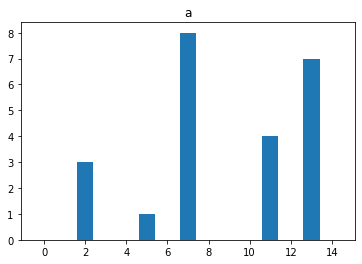

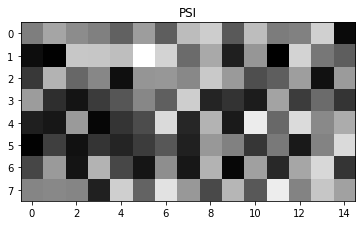

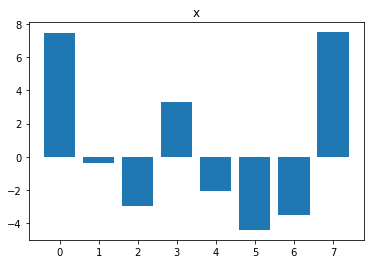

[ 7.41525384 -0.38694127 -2.95239714  3.31652352 -2.04825584 -4.38717742
 -3.4922261   7.48487842]


In [199]:
#a_real
a_real = np.array([[0,0,3,0,0,1,0,8,0,0,0,4,0,7,0]],dtype=float).T
d = a_real.size
print('d =',d)

plt.bar(range(d),a_real[:,0])
plt.title('a')
plt.show()

#PSI: I want to be a Normal random distribution
np.random.seed(0)
N = 8
PSI = np.random.rand(N,d) #Not randn bbut rand
# PSI -= np.amin(PSI)
# PSI /= np.amax(PSI)/2
PSI -= PSI.mean()

#Normalization?
# for j in range(d):
#     PSI[:,j] /= np.sum(PSI[:,j])   #This one? L1

# for j in range(d):
#     PSI[:,j] /= np.max(PSI[:,j])  #This one? Max

# for j in range(d):
#     PSI[:,j] -= PSI[:,j].mean()
#     PSI[:,j] /= PSI[:,j].std()
#     PSI[:,j] -= np.amin(PSI[:,j])
#     PSI[:,j] /= np.amax(PSI[:,j])

for j in range(d):
    PSI[:,j] /= np.linalg.norm(PSI[:,j])   #This one? L2

PSI -= PSI.mean()

plt.imshow(PSI, cmap='gray')
plt.title('PSI')
plt.show()

#x
x = PSI@a_real

plt.bar(range(N),x[:,0])
plt.title('x')
plt.show()
print(x[:,0])

r - [x-PSI*a_(k+1)] = 0.0, ans: 0.0
<r_(k+1),PSI_i*> = 0.0, ans: -0.001272260034063999
r - [x-PSI*a_(k+1)] = 0.0, ans: 1.1102230246251565e-16
<r_(k+1),PSI_i*> = 0.0, ans: 0.007889756891416466
r - [x-PSI*a_(k+1)] = 0.0, ans: 4.996003610813204e-16
<r_(k+1),PSI_i*> = 0.0, ans: -0.0015693346389825669
r - [x-PSI*a_(k+1)] = 0.0, ans: 5.551115123125783e-17
<r_(k+1),PSI_i*> = 0.0, ans: -0.0003043921322114229
r - [x-PSI*a_(k+1)] = 0.0, ans: 1.5543122344752192e-15
<r_(k+1),PSI_i*> = 0.0, ans: 3.649819828080436e-05
r - [x-PSI*a_(k+1)] = 0.0, ans: -6.38378239159465e-16
<r_(k+1),PSI_i*> = 0.0, ans: 0.0001832367820147479


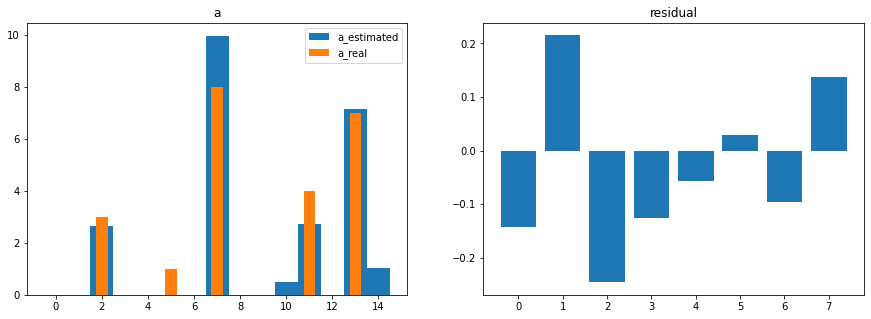

In [200]:
r = x
a = a_real*0
k = 0
s = 5

while (k<=s):
    #atom selection
    arg2max_array = np.array([[]])
    for i in range(d):
        arg2max = abs(PSI[:,i:i+1].T@r)
        arg2max_array = np.append(arg2max_array,arg2max,axis=1)

    i_star, = np.where(arg2max_array[0,:]==np.amax(arg2max_array[0,:]))
    i_star = int(i_star)

    #coef. update
    e = a*0
    e[i_star,0]=1
    a = a + (PSI[:,i_star:i_star+1].T@r)*e

    #residual update
    r = r - (PSI[:,i_star:i_star+1].T@r)*PSI[:,i_star:i_star+1]
    r2 = x - PSI@a
    print('r - [x-PSI*a_(k+1)] = 0.0, ans:',np.sum(r-r2))
    print('<r_(k+1),PSI_i*> = 0.0, ans:',float(r.T@PSI[:,i_star:i_star+1]))
    
    k += 1
    # print('k =',k)
    # print(np.amax(arg2max_array[0,:]))
    # plt.bar(range(d),arg2max_array[0,:])
    # plt.show()
    # plt.bar(range(d),a[:,0])
    # plt.show()

fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
plt.bar(range(d), a[:,0], width=1, label='a_estimated')
plt.bar(range(d), a_real[:,0], width=0.5, label='a_real')
plt.title('a')
plt.legend()
fig.add_subplot(1, 2, 2)
plt.bar(range(N),r[:,0])
plt.title('residual')
plt.show()

## OMP

[7.]
[ 7. 13.]
[ 7. 13.  2.]
[ 7. 13.  2.  3.]
[ 7. 13.  2.  3.  9.]
[ 7. 13.  2.  3.  9.  8.]


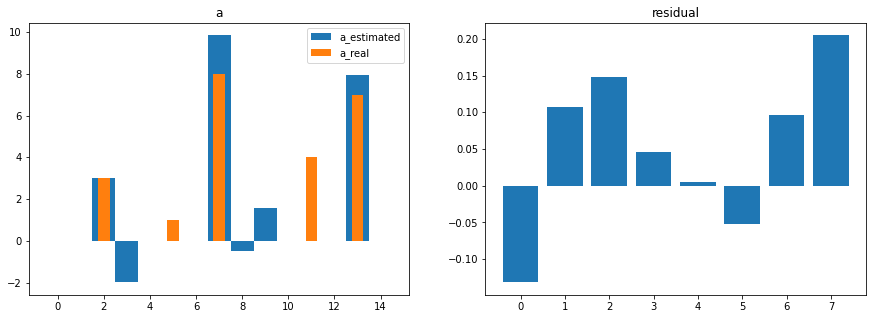

In [201]:
r = x
a = a_real*0
k = 0
s = 5
S = np.array([])
PSIS = np.empty((N, 0), float)

while (k<=s):
    #atom selection
    arg2max_array = np.array([[]])
    for i in range(d):
        arg2max = abs(PSI[:,i:i+1].T@r)
        arg2max_array = np.append(arg2max_array,arg2max,axis=1)

    i_star, = np.where(arg2max_array[0,:]==np.amax(arg2max_array[0,:]))
    i_star = int(i_star)

    #support update
    S = np.append(S,i_star)

    # #coef. update
    # arg2min_array = np.array([[]])
    # for ai in range(d):
    #     arg2min = 0.5*np.linalg.norm(x-PSI@ai)**2
    #     arg2min_array = np.append(arg2min_array,arg2min,axis=1)

    # numerical shortcut
    PSIS = np.append(PSIS, PSI[:,i_star:i_star+1], axis=1)
    aS = np.linalg.inv(PSIS.T@PSIS)@PSIS.T@x

    a = a_real*0
    for index in range(len(S)):
        ind2a = int(S[index])
        a[ind2a] = aS[index]
    print(S)

    #residual update
    r  = x - PSIS@aS
    
    k += 1
    # print('k =',k)
    # print(np.amax(arg2max_array[0,:]))
    # plt.bar(range(d),arg2max_array[0,:])
    # plt.show()
    # plt.bar(range(d),a[:,0])
    # plt.show()

fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
plt.bar(range(d), a[:,0], width=1, label='a_estimated')
plt.bar(range(d), a_real[:,0], width=0.5, label='a_real')
plt.title('a')
plt.legend()
fig.add_subplot(1, 2, 2)
plt.bar(range(N),r[:,0])
plt.title('residual')
plt.show()